In [58]:
import json
import datetime
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


In [60]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

Setelah import hal-hal yang menurut saya penting dan untuk mengolah data seperti import numpy untuk menyediakan objek array multidimensi, import pandas untuk menyediakan struktur data agar dapat manipulasi tabel yang disebut dataframe, import seaborn untuk menyediakan interface visualisasi data, dan lain-lain.

Pertama proses data csv dan masukan ke dalam variabel df, terlihat output (1000,69) yang berarti ada 1000 baris dengan 69 columns.

In [62]:
df = pd.read_csv('/content/drive/MyDrive/TUGAS AI/[Dataset]_(Asuransi).csv')
df.shape

(1000, 69)

**1. BAGIAN NORMALISASI, CLEANING, DISTRIBUSI DATA**

Untuk menghapus baris yang terdapat missing value

In [63]:
df.dropna()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,0,20,1,1,87200,0,1,0,...,0,0,0,0,0,0,0,1,0,0
996,996,70900,0,23,1,3,108480,0,1,0,...,0,0,0,0,0,0,0,1,0,0
997,997,35100,0,4,3,3,67500,0,1,0,...,0,0,0,0,0,0,0,1,0,0
998,998,0,0,2,1,1,46980,0,0,1,...,0,0,0,1,0,0,0,1,0,0


hapus column yang tidak penting atau tidak ada nama, agar memperingan pemrosesan data

In [64]:
df = df.drop(columns=['Unnamed: 0'])

Untuk mengecek jika ada data anomali di dataset csv.

In [65]:
df.isna().sum()

capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
witnesses                                 0
                                         ..
policy_annual_premium_groups_high         0
policy_annual_premium_groups_low          0
policy_annual_premium_groups_medium       0
policy_annual_premium_groups_very high    0
policy_annual_premium_groups_very low     0
Length: 68, dtype: int64

In [66]:
null_check = df.isnull().sum()
any_null = df.isnull().any().any()

print(null_check)

if any_null:
    print("\nAda nilai null.")
else:
    print("\nTidak ada nilai null.")

capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
witnesses                                 0
                                         ..
policy_annual_premium_groups_high         0
policy_annual_premium_groups_low          0
policy_annual_premium_groups_medium       0
policy_annual_premium_groups_very high    0
policy_annual_premium_groups_very low     0
Length: 68, dtype: int64

Tidak ada nilai null.


In [67]:
df

,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,53300,0,5,1,2,71610,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,8,1,0,5070,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,35100,0,7,3,3,34650,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,48900,-62400,5,1,2,63400,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,66000,-46000,20,1,1,6500,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,20,1,1,87200,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
996,70900,0,23,1,3,108480,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
997,35100,0,4,3,3,67500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
998,0,0,2,1,1,46980,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


Untuk melihat data type masing-masing columns, terlihat sudah sama semua int64.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 68 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   capital-gains                           1000 non-null   int64
 1   capital-loss                            1000 non-null   int64
 2   incident_hour_of_the_day                1000 non-null   int64
 3   number_of_vehicles_involved             1000 non-null   int64
 4   witnesses                               1000 non-null   int64
 5   total_claim_amount                      1000 non-null   int64
 6   fraud_reported                          1000 non-null   int64
 7   insured_sex_FEMALE                      1000 non-null   int64
 8   insured_sex_MALE                        1000 non-null   int64
 9   insured_occupation_adm-clerical         1000 non-null   int64
 10  insured_occupation_armed-forces         1000 non-null   int64
 11  insured_occupation

Saya mengecek dari "fraud_reported", jadi ada 247 kecurangan asuransi, dan 753 aman. 1 dianggap True bahwa terjadi fraud, 0 dianggap tidak terjadi fraud.

In [69]:
df['fraud_reported'].value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

Perbandingan dalam bentuk bar graph

<Axes: xlabel='fraud_reported'>

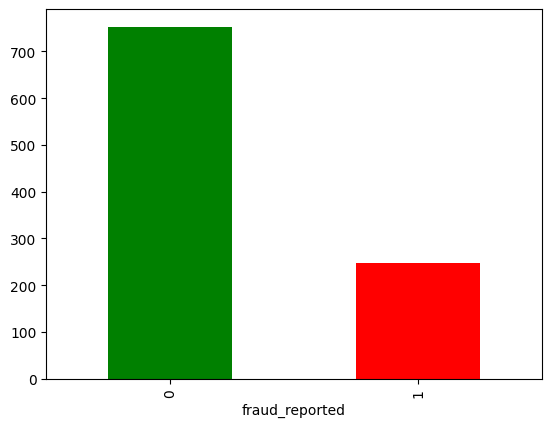

In [70]:
df['fraud_reported'].value_counts().plot(kind="bar", color=["green", "red"])

Untuk mengecek hal-hal di dataset menggunakan describe(), seperti mean, min, max, dan lain-lain agar mudah dipahami hal apa yang perlu diperhatikan untuk deteksi kecurangan asuransi.

In [71]:
df.describe()

,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.0000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,25126.100000,-26793.700000,11.644000,1.83900,1.487000,52761.94000,0.247000,0.537000,0.463000,0.065000,...,0.080000,0.043000,0.04200,0.047000,0.1020,0.153000,0.151000,0.69300,0.001000,0.002000
std,27872.187708,28104.096686,6.951373,1.01888,1.111335,26401.53319,0.431483,0.498879,0.498879,0.246649,...,0.271429,0.202959,0.20069,0.211745,0.3028,0.360168,0.358228,0.46148,0.031623,0.044699
min,0.000000,-111100.000000,0.000000,1.00000,0.000000,100.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,-51500.000000,6.000000,1.00000,1.000000,41812.50000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,-23250.000000,12.000000,1.00000,1.000000,58055.00000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,51025.000000,0.000000,17.000000,3.00000,2.000000,70592.50000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
max,100500.000000,0.000000,23.000000,4.00000,3.000000,114920.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1.000000,1.00000,1.000000,1.000000


Mengecek pemilik asuransi didominasi oleh gender apa, dari "insured_sex_Male", total gender MALE adalah 463, dan FEMALE adalah 537.

In [72]:
df['insured_sex_MALE'].value_counts()

insured_sex_MALE
0    537
1    463
Name: count, dtype: int64

Membandingkan antara jumlah gender dengan jumlah fraud, terlihat kalau kebanyakan yang terkena fraud adalah FEMALE.

In [73]:

cross_tab = pd.crosstab(df['fraud_reported'], df['insured_sex_MALE'])

# Renaming the column
cross_tab.rename(columns={0: 'female', 1 : 'male'}, inplace=True)
cross_tab.rename(index = {0: 'no', 1 : 'yes'}, inplace=True)
cross_tab

insured_sex_MALE,female,male
fraud_reported,,
no,411,342
yes,126,121


Kita buat pie chart untuk membandingkan lebih besar gender mana kemungkinan untuk terkena fraud.

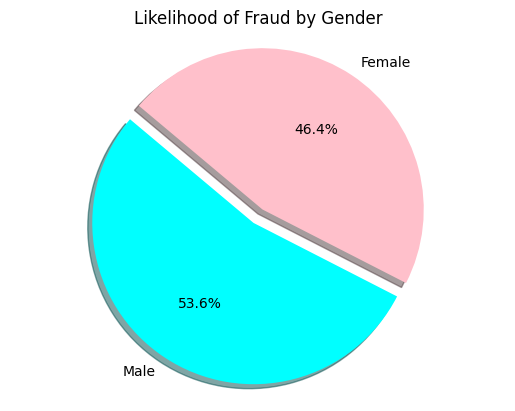

In [74]:
fraud_data = {
    'yes': [126, 121],
    'no': [411, 342]
}

# Menghitung persentase kemungkinan terkena fraud
percent_fraud_yes = (fraud_data['yes'][1] / fraud_data['yes'][0]) * 100
percent_fraud_no = (fraud_data['no'][1] / fraud_data['no'][0]) * 100

# Plotting pie chart
labels = ['Male', 'Female']
sizes = [percent_fraud_yes, percent_fraud_no]
colors = ['cyan', 'pink']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Likelihood of Fraud by Gender')
plt.show()

Bisa dilihat kalau gender MALE lebih besar kemungkinan untuk terkena fraud.

Membandingkan ada berapa witnesses dalam setiap fraud_reported

In [75]:

cross_tab_witnesses = pd.crosstab(df['fraud_reported'], df['witnesses'])

# Renaming the column
cross_tab_witnesses.rename(index = {0: 'no', 1 : 'yes'}, inplace=True)
cross_tab_witnesses

witnesses,0,1,2,3
fraud_reported,,,,
no,199,195,176,183
yes,50,63,74,60


Buat bar graph untuk melihat visualisasi data lebih jelas

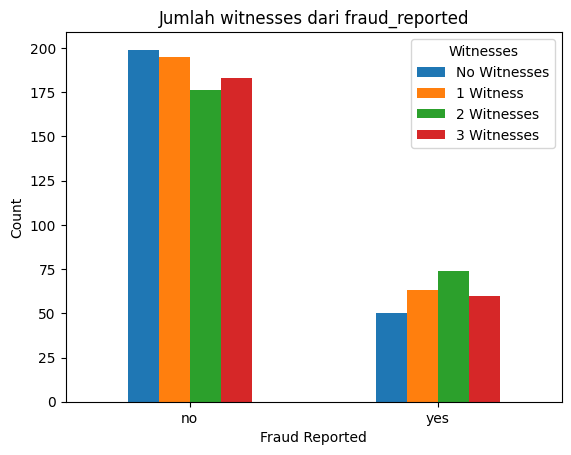

In [76]:
# Plotting the bar graph
cross_tab_witnesses.plot(kind='bar', stacked=False)

# Customizing the plot
plt.title('Jumlah witnesses dari fraud_reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Witnesses', labels=['No Witnesses', '1 Witness', '2 Witnesses', '3 Witnesses'])

# Show plot
plt.show()

**2. MULAI PAKAI ALGORITMA CLASSIFICATION RANDOM FORREST UNTUK PENGGUNAAN AI**

Buat 2 variabel, X untuk menggunakan data input yang akan ditrain, dan y untuk menentukan target dari data yang ingin diramal.

In [77]:
X = df.drop(columns=['fraud_reported']) #fitur
y = df['fraud_reported'] #target

test_size = 0.2 berarti 20% untuk test, dan 80% untuk training data. Training data harus lebih besar signifikan daripada test agar lebih akurat hasil perhitungannya.

random_state = 71220840 hanya untuk agar urutan datanya saat diacak, tetap konsisten, mirip seperti seed di random number generator.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71220840)

n_estimator = 32 merupakan jumlahn decision tree yang akan digunakan dalam random forrest. Jadi random forrest sendiri merupakan AI yang memanfaatkan percabangan, jadi hasil yang akan diambil adalah hasil dari keputusan terbanyak yang diambil oleh decision tree tersebut.

In [121]:
rf = RandomForestClassifier(n_estimators=32, random_state=71220840)
rf.fit(X_train, y_train) #kode untuk train
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy:", accuracy)

y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("train Accuracy", train_accuracy)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)
print('')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

test Accuracy: 0.995
train Accuracy 0.997
Recall: 0.9791666666666666

Confusion Matrix:
[[152   0]
 [  1  47]]


Bisa kita lihat kalau semuanya tidak mencapai 1.0 untuk test accuracy, train accuracy, dan recall, karena AI tidak pernah 100% benar dalam memprediksi.

Dalam Confusion Matrix,

152 adalah True Positif, yaitu kasus yang benar-benar positif dan diprediksi benar

0 adalah False Negatives, yaitu tidak ada kasus yang seharusnya positif yang salah diprediksi sebagai negatif

1 adalah False Positives, yaitu satu kasus yang seharusnya negatif yang salah diprediksi sebagai positif

47 adalah True Negatives, yaitu kasus yang benar-benar negatif dan diprediksi benar


Dari hal ini, bahwa model AI saya memiliki kinerja yang sangat baik, karena jumlah false positives dan false negatives sangat rendah.

Dibawah ini untuk membandingkan antara Training Score dan Cross-validation Score

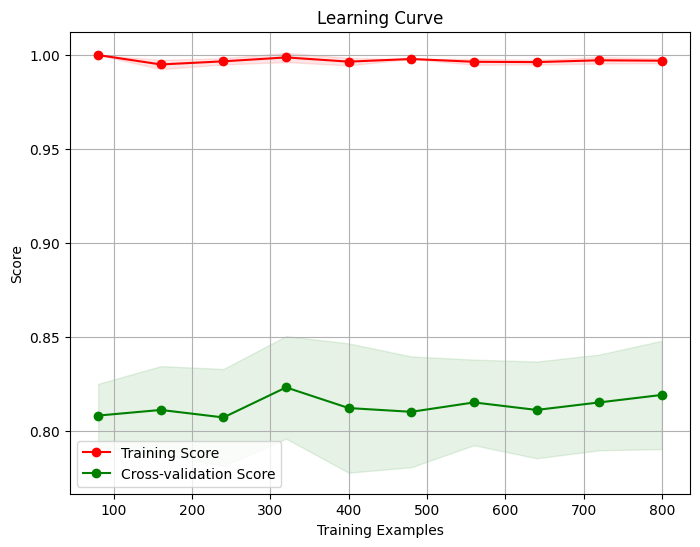

In [122]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    # Menghitung rata-rata dan standar deviasi dari skor train dan test
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Membuat plot learning curve
    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    # Menampilkan kurva train accuracy
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")

    # Menampilkan kurva test accuracy
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.legend(loc="best")
    plt.show()

# Menggunakan fungsi plot_learning_curve untuk memvisualisasikan learning curve
plot_learning_curve(rf, X_train, y_train)

Di bawah ini adalah bagian untuk menerima input data agar dapat diprediksi berdasarkan data yang dimasukan oleh user, saya buat manual seperti ini menjadi banyak percabangan karena harus semua parameter dimasukan, dan agar mudah sya buat seperti percabangan di bawah. Di akhir, AI akan menampilkan berapa persen kemungkinan terjadi Fraud / Penipuan Asuransi, dengan statusnya sebagai kemungkinan rendah, sedang, atau tinggi.

In [123]:

# Input data
capital_gains = int(input('capital-gains: '))
capital_loss = int(input('capital-loss: '))
incident_hour_of_the_day = int(input('incident_hour_of_the_day: '))
number_of_vehicles_involved = int(input('number_of_vehicles_involved: '))
witnesses = int(input('witnesses: '))
total_claim_amount = int(input('total_claim_amount: '))

gender = (input('MALE / FEMALE ? Isi sesuai format: ')).upper()
if gender == 'MALE':
  insured_sex_FEMALE = 0
  insured_sex_MALE = 1
elif gender == 'FEMALE':
  insured_sex_FEMALE = 1
  insured_sex_MALE = 0
else:
  print('Input anda salah!')

occupation = input('Insured Occupation (adm-clerical/armed-forces/craft-repair/exec-managerial/farming-fishing/handlers-cleaners/machine-op-inspct/other-service/priv-house-serv/prof-specialty/protective-serv/sales/tech-support/transport-moving): ').lower()

if occupation == 'adm-clerical':
    insured_occupation_adm_clerical = 1
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'armed-forces':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 1
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'craft-repair':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 1
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'exec-managerial':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 1
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'farming-fishing':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 1
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'handlers-cleaners':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 1
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'machine-op-inspct':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 1
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'other-service':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 1
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'priv-house-serv':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 1
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'prof-specialty':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 1
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'protective-serv':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 1
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'sales':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 1
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0
elif occupation == 'tech-support':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 1
    insured_occupation_transport_moving = 0
elif occupation == 'transport-moving':
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 1
else:
    print("Invalid input for insured occupation.")
    insured_occupation_adm_clerical = 0
    insured_occupation_armed_forces = 0
    insured_occupation_craft_repair = 0
    insured_occupation_exec_managerial = 0
    insured_occupation_farming_fishing = 0
    insured_occupation_handlers_cleaners = 0
    insured_occupation_machine_op_inspct = 0
    insured_occupation_other_service = 0
    insured_occupation_priv_house_serv = 0
    insured_occupation_prof_specialty = 0
    insured_occupation_protective_serv = 0
    insured_occupation_sales = 0
    insured_occupation_tech_support = 0
    insured_occupation_transport_moving = 0


hobby = input('Insured Hobby (chess/cross-fit/other): ').lower()

if hobby == 'chess':
    insured_hobbies_chess = 1
    insured_hobbies_cross_fit = 0
    insured_hobbies_other = 0
elif hobby == 'cross-fit':
    insured_hobbies_chess = 0
    insured_hobbies_cross_fit = 1
    insured_hobbies_other = 0
elif hobby == 'other':
    insured_hobbies_chess = 0
    insured_hobbies_cross_fit = 0
    insured_hobbies_other = 1
else:
    insured_hobbies_chess = 0
    insured_hobbies_cross_fit = 0
    insured_hobbies_other = 0

incidentType = input('Incident Type (Multi-vehicle Collision/Parked Car/Single Vehicle Collision/Vehicle Theft): ').lower()

if incidentType == 'multi-vehicle collision':
    incident_type_multi_vehicle_collision = 1
    incident_type_parked_car = 0
    incident_type_single_vehicle_collision = 0
    incident_type_vehicle_theft = 0
elif incidentType == 'parked car':
    incident_type_multi_vehicle_collision = 0
    incident_type_parked_car = 1
    incident_type_single_vehicle_collision = 0
    incident_type_vehicle_theft = 0
elif incidentType == 'single vehicle collision':
    incident_type_multi_vehicle_collision = 0
    incident_type_parked_car = 0
    incident_type_single_vehicle_collision = 1
    incident_type_vehicle_theft = 0
elif incidentType == 'vehicle theft':
    incident_type_multi_vehicle_collision = 0
    incident_type_parked_car = 0
    incident_type_single_vehicle_collision = 0
    incident_type_vehicle_theft = 1
else:
    print("Invalid input for incident type.")
    incident_type_multi_vehicle_collision = 0
    incident_type_parked_car = 0
    incident_type_single_vehicle_collision = 0
    incident_type_vehicle_theft = 0


collisionType = input('Collision Type (?/Front Collision/Rear Collision/Side Collision): ').lower()

if collisionType == '?':
    collision_type_unknown = 1
    collision_type_front_collision = 0
    collision_type_rear_collision = 0
    collision_type_side_collision = 0
elif collisionType == 'front collision':
    collision_type_unknown = 0
    collision_type_front_collision = 1
    collision_type_rear_collision = 0
    collision_type_side_collision = 0
elif collisionType == 'rear collision':
    collision_type_unknown = 0
    collision_type_front_collision = 0
    collision_type_rear_collision = 1
    collision_type_side_collision = 0
elif collisionType == 'side collision':
    collision_type_unknown = 0
    collision_type_front_collision = 0
    collision_type_rear_collision = 0
    collision_type_side_collision = 1
else:
    print("Invalid input for collision type.")
    collision_type_unknown = 0
    collision_type_front_collision = 0
    collision_type_rear_collision = 0
    collision_type_side_collision = 0


incidentSeverity = input('Severity of Incident (Major Damage/Minor Damage/Total Loss/Trivial Damage): ').lower()

if incidentSeverity == 'major damage':
    incident_severity_major_damage = 1
    incident_severity_minor_damage = 0
    incident_severity_total_loss = 0
    incident_severity_trivial_damage = 0
elif incidentSeverity == 'minor damage':
    incident_severity_major_damage = 0
    incident_severity_minor_damage = 1
    incident_severity_total_loss = 0
    incident_severity_trivial_damage = 0
elif incidentSeverity == 'total loss':
    incident_severity_major_damage = 0
    incident_severity_minor_damage = 0
    incident_severity_total_loss = 1
    incident_severity_trivial_damage = 0
elif incidentSeverity == 'trivial damage':
    incident_severity_major_damage = 0
    incident_severity_minor_damage = 0
    incident_severity_total_loss = 0
    incident_severity_trivial_damage = 1
else:
    print("Invalid input for incident severity.")
    incident_severity_major_damage = 0
    incident_severity_minor_damage = 0
    incident_severity_total_loss = 0
    incident_severity_trivial_damage = 0


yangdikontak = input('Otoritas yang dikontak (ambulance/fire/none/other/police): ').lower()

if yangdikontak == 'ambulance':
    authorities_contacted_ambulance = 1
    authorities_contacted_fire = 0
    authorities_contacted_none = 0
    authorities_contacted_other = 0
    authorities_contacted_police = 0
elif yangdikontak == 'fire':
    authorities_contacted_ambulance = 0
    authorities_contacted_fire = 1
    authorities_contacted_none = 0
    authorities_contacted_other = 0
    authorities_contacted_police = 0
elif yangdikontak == 'none':
    authorities_contacted_ambulance = 0
    authorities_contacted_fire = 0
    authorities_contacted_none = 1
    authorities_contacted_other = 0
    authorities_contacted_police = 0
elif yangdikontak == 'other':
    authorities_contacted_ambulance = 0
    authorities_contacted_fire = 0
    authorities_contacted_none = 0
    authorities_contacted_other = 1
    authorities_contacted_police = 0
elif yangdikontak == 'police':
    authorities_contacted_ambulance = 0
    authorities_contacted_fire = 0
    authorities_contacted_none = 0
    authorities_contacted_other = 0
    authorities_contacted_police = 1
else:
    print("Invalid input for authorities contacted.")
    authorities_contacted_ambulance = 0
    authorities_contacted_fire = 0
    authorities_contacted_none = 0
    authorities_contacted_other = 0
    authorities_contacted_police = 0


umur = int(input('Umur: '))

if 15 <= umur <= 20:
    age_group_15_20 = 1
    age_group_21_25 = 0
    age_group_26_30 = 0
    age_group_31_35 = 0
    age_group_36_40 = 0
    age_group_41_45 = 0
    age_group_46_50 = 0
    age_group_51_55 = 0
    age_group_56_60 = 0
    age_group_61_65 = 0
elif 21 <= umur <= 25:
    age_group_15_20 = 0
    age_group_21_25 = 1
    age_group_26_30 = 0
    age_group_31_35 = 0
    age_group_36_40 = 0
    age_group_41_45 = 0
    age_group_46_50 = 0
    age_group_51_55 = 0
    age_group_56_60 = 0
    age_group_61_65 = 0
elif 26 <= umur <= 30:
    age_group_15_20 = 0
    age_group_21_25 = 0
    age_group_26_30 = 1
    age_group_31_35 = 0
    age_group_36_40 = 0
    age_group_41_45 = 0
    age_group_46_50 = 0
    age_group_51_55 = 0
    age_group_56_60 = 0
    age_group_61_65 = 0
elif 31 <= umur <= 35:
    age_group_15_20 = 0
    age_group_21_25 = 0
    age_group_26_30 = 0
    age_group_31_35 = 1
    age_group_36_40 = 0
    age_group_41_45 = 0
    age_group_46_50 = 0
    age_group_51_55 = 0
    age_group_56_60 = 0
    age_group_61_65 = 0
elif 36 <= umur <= 40:
    age_group_15_20 = 0
    age_group_21_25 = 0
    age_group_26_30 = 0
    age_group_31_35 = 0
    age_group_36_40 = 1
    age_group_41_45 = 0
    age_group_46_50 = 0
    age_group_51_55 = 0
    age_group_56_60 = 0
    age_group_61_65 = 0
elif 41 <= umur <= 45:
    age_group_15_20 = 0
    age_group_21_25 = 0
    age_group_26_30 = 0
    age_group_31_35 = 0
    age_group_36_40 = 0
    age_group_41_45 = 1
    age_group_46_50 = 0
    age_group_51_55 = 0
    age_group_56_60 = 0
    age_group_61_65 = 0
elif 46 <= umur <= 50:
    age_group_15_20 = 0
    age_group_21_25 = 0
    age_group_26_30 = 0
    age_group_31_35 = 0
    age_group_36_40 = 0
    age_group_41_45 = 0
    age_group_46_50 = 1
    age_group_51_55 = 0
    age_group_56_60 = 0
    age_group_61_65 = 0
elif 51 <= umur <= 55:
    age_group_15_20 = 0
    age_group_21_25 = 0
    age_group_26_30 = 0
    age_group_31_35 = 0
    age_group_36_40 = 0
    age_group_41_45 = 0
    age_group_46_50 = 0
    age_group_51_55 = 1
    age_group_56_60 = 0
    age_group_61_65 = 0
elif 56 <= umur <= 60:
    age_group_15_20 = 0
    age_group_21_25 = 0
    age_group_26_30 = 0
    age_group_31_35 = 0
    age_group_36_40 = 0
    age_group_41_45 = 0
    age_group_46_50 = 0
    age_group_51_55 = 0
    age_group_56_60 = 1
    age_group_61_65 = 0
elif 61 <= umur <= 65:
    age_group_15_20 = 0
    age_group_21_25 = 0
    age_group_26_30 = 0
    age_group_31_35 = 0
    age_group_36_40 = 0
    age_group_41_45 = 0
    age_group_46_50 = 0
    age_group_51_55 = 0
    age_group_56_60 = 0
    age_group_61_65 = 1
else:
    print("Age out of range for defined groups.")
    age_group_15_20 = 0
    age_group_21_25 = 0
    age_group_26_30 = 0
    age_group_31_35 = 0
    age_group_36_40 = 0
    age_group_41_45 = 0
    age_group_46_50 = 0
    age_group_51_55 = 0
    age_group_56_60 = 0
    age_group_61_65 = 0

lamaBulan = int(input('Lama berlangganan Asuransi dalam jumlah bulan: '))

if 0 <= lamaBulan <= 50:
    months_as_customer_groups_0_50 = 1
    months_as_customer_groups_51_100 = 0
    months_as_customer_groups_101_150 = 0
    months_as_customer_groups_151_200 = 0
    months_as_customer_groups_201_250 = 0
    months_as_customer_groups_251_300 = 0
    months_as_customer_groups_301_350 = 0
    months_as_customer_groups_351_400 = 0
    months_as_customer_groups_401_450 = 0
    months_as_customer_groups_451_500 = 0
elif 51 <= lamaBulan <= 100:
    months_as_customer_groups_0_50 = 0
    months_as_customer_groups_51_100 = 1
    months_as_customer_groups_101_150 = 0
    months_as_customer_groups_151_200 = 0
    months_as_customer_groups_201_250 = 0
    months_as_customer_groups_251_300 = 0
    months_as_customer_groups_301_350 = 0
    months_as_customer_groups_351_400 = 0
    months_as_customer_groups_401_450 = 0
    months_as_customer_groups_451_500 = 0
elif 101 <= lamaBulan <= 150:
    months_as_customer_groups_0_50 = 0
    months_as_customer_groups_51_100 = 0
    months_as_customer_groups_101_150 = 1
    months_as_customer_groups_151_200 = 0
    months_as_customer_groups_201_250 = 0
    months_as_customer_groups_251_300 = 0
    months_as_customer_groups_301_350 = 0
    months_as_customer_groups_351_400 = 0
    months_as_customer_groups_401_450 = 0
    months_as_customer_groups_451_500 = 0
elif 151 <= lamaBulan <= 200:
    months_as_customer_groups_0_50 = 0
    months_as_customer_groups_51_100 = 0
    months_as_customer_groups_101_150 = 0
    months_as_customer_groups_151_200 = 1
    months_as_customer_groups_201_250 = 0
    months_as_customer_groups_251_300 = 0
    months_as_customer_groups_301_350 = 0
    months_as_customer_groups_351_400 = 0
    months_as_customer_groups_401_450 = 0
    months_as_customer_groups_451_500 = 0
elif 201 <= lamaBulan <= 250:
    months_as_customer_groups_0_50 = 0
    months_as_customer_groups_51_100 = 0
    months_as_customer_groups_101_150 = 0
    months_as_customer_groups_151_200 = 0
    months_as_customer_groups_201_250 = 1
    months_as_customer_groups_251_300 = 0
    months_as_customer_groups_301_350 = 0
    months_as_customer_groups_351_400 = 0
    months_as_customer_groups_401_450 = 0
    months_as_customer_groups_451_500 = 0
elif 251 <= lamaBulan <= 300:
    months_as_customer_groups_0_50 = 0
    months_as_customer_groups_51_100 = 0
    months_as_customer_groups_101_150 = 0
    months_as_customer_groups_151_200 = 0
    months_as_customer_groups_201_250 = 0
    months_as_customer_groups_251_300 = 1
    months_as_customer_groups_301_350 = 0
    months_as_customer_groups_351_400 = 0
    months_as_customer_groups_401_450 = 0
    months_as_customer_groups_451_500 = 0
elif 301 <= lamaBulan <= 350:
    months_as_customer_groups_0_50 = 0
    months_as_customer_groups_51_100 = 0
    months_as_customer_groups_101_150 = 0
    months_as_customer_groups_151_200 = 0
    months_as_customer_groups_201_250 = 0
    months_as_customer_groups_251_300 = 0
    months_as_customer_groups_301_350 = 1
    months_as_customer_groups_351_400 = 0
    months_as_customer_groups_401_450 = 0
    months_as_customer_groups_451_500 = 0
elif 351 <= lamaBulan <= 400:
    months_as_customer_groups_0_50 = 0
    months_as_customer_groups_51_100 = 0
    months_as_customer_groups_101_150 = 0
    months_as_customer_groups_151_200 = 0
    months_as_customer_groups_201_250 = 0
    months_as_customer_groups_251_300 = 0
    months_as_customer_groups_301_350 = 0
    months_as_customer_groups_351_400 = 1
    months_as_customer_groups_401_450 = 0
    months_as_customer_groups_451_500 = 0
elif 401 <= lamaBulan <= 450:
    months_as_customer_groups_0_50 = 0
    months_as_customer_groups_51_100 = 0
    months_as_customer_groups_101_150 = 0
    months_as_customer_groups_151_200 = 0
    months_as_customer_groups_201_250 = 0
    months_as_customer_groups_251_300 = 0
    months_as_customer_groups_301_350 = 0
    months_as_customer_groups_351_400 = 0
    months_as_customer_groups_401_450 = 1
    months_as_customer_groups_451_500 = 0
elif 451 <= lamaBulan <= 500:
    months_as_customer_groups_0_50 = 0
    months_as_customer_groups_51_100 = 0
    months_as_customer_groups_101_150 = 0
    months_as_customer_groups_151_200 = 0
    months_as_customer_groups_201_250 = 0
    months_as_customer_groups_251_300 = 0
    months_as_customer_groups_301_350 = 0
    months_as_customer_groups_351_400 = 0
    months_as_customer_groups_401_450 = 0
    months_as_customer_groups_451_500 = 1
else:
    print("Lama berlangganan out of range for defined groups.")
    months_as_customer_groups_0_50 = 0
    months_as_customer_groups_51_100 = 0
    months_as_customer_groups_101_150 = 0
    months_as_customer_groups_151_200 = 0
    months_as_customer_groups_201_250 = 0
    months_as_customer_groups_251_300 = 0
    months_as_customer_groups_301_350 = 0
    months_as_customer_groups_351_400 = 0
    months_as_customer_groups_401_450 = 0
    months_as_customer_groups_451_500 = 0

policyAnnual = input('Policy Annual (high/low/medium/very high/very low): ').lower()

if policyAnnual == 'high':
    policy_annual_premium_groups_high = 1
    policy_annual_premium_groups_low = 0
    policy_annual_premium_groups_medium = 0
    policy_annual_premium_groups_very_high = 0
    policy_annual_premium_groups_very_low = 0
elif policyAnnual == 'low':
    policy_annual_premium_groups_high = 0
    policy_annual_premium_groups_low = 1
    policy_annual_premium_groups_medium = 0
    policy_annual_premium_groups_very_high = 0
    policy_annual_premium_groups_very_low = 0
elif policyAnnual == 'medium':
    policy_annual_premium_groups_high = 0
    policy_annual_premium_groups_low = 0
    policy_annual_premium_groups_medium = 1
    policy_annual_premium_groups_very_high = 0
    policy_annual_premium_groups_very_low = 0
elif policyAnnual == 'very high':
    policy_annual_premium_groups_high = 0
    policy_annual_premium_groups_low = 0
    policy_annual_premium_groups_medium = 0
    policy_annual_premium_groups_very_high = 1
    policy_annual_premium_groups_very_low = 0
elif policyAnnual == 'very low':
    policy_annual_premium_groups_high = 0
    policy_annual_premium_groups_low = 0
    policy_annual_premium_groups_medium = 0
    policy_annual_premium_groups_very_high = 0
    policy_annual_premium_groups_very_low = 1
else:
    print("Invalid input for policy annual premium group.")
    policy_annual_premium_groups_high = 0
    policy_annual_premium_groups_low = 0
    policy_annual_premium_groups_medium = 0
    policy_annual_premium_groups_very_high = 0
    policy_annual_premium_groups_very_low = 0


# Buat DataFrame baru sesuai dengan format yang dimiliki oleh model
input_data = {
    'capital-gains': [capital_gains],
    'capital-loss': [capital_loss],
    'total_claim_amount': [total_claim_amount],

    'insured_sex_FEMALE': [insured_sex_FEMALE],
    'insured_sex_MALE': [insured_sex_MALE],

    'incident_hour_of_the_day': [incident_hour_of_the_day],
    'number_of_vehicles_involved': [number_of_vehicles_involved],
    'witnesses': [witnesses],

    'insured_occupation_adm-clerical': [insured_occupation_adm_clerical],
    'insured_occupation_armed-forces': [insured_occupation_armed_forces],
    'insured_occupation_craft-repair': [insured_occupation_craft_repair],
    'insured_occupation_exec-managerial': [insured_occupation_exec_managerial],
    'insured_occupation_farming-fishing': [insured_occupation_farming_fishing],
    'insured_occupation_handlers-cleaners': [insured_occupation_handlers_cleaners],
    'insured_occupation_machine-op-inspct': [insured_occupation_machine_op_inspct],
    'insured_occupation_other-service': [insured_occupation_other_service],
    'insured_occupation_priv-house-serv': [insured_occupation_priv_house_serv],
    'insured_occupation_prof-specialty': [insured_occupation_prof_specialty],
    'insured_occupation_protective-serv': [insured_occupation_protective_serv],
    'insured_occupation_sales': [insured_occupation_sales],
    'insured_occupation_tech-support': [insured_occupation_tech_support],
    'insured_occupation_transport-moving': [insured_occupation_transport_moving],

    'insured_hobbies_chess': [insured_hobbies_chess],
    'insured_hobbies_cross-fit': [insured_hobbies_cross_fit],
    'insured_hobbies_other': [insured_hobbies_other],

    'incident_type_Multi-vehicle Collision': [incident_type_multi_vehicle_collision],
    'incident_type_Parked Car': [incident_type_parked_car],
    'incident_type_Single Vehicle Collision': [incident_type_single_vehicle_collision],
    'incident_type_Vehicle Theft': [incident_type_vehicle_theft],

    'collision_type_?': [collision_type_unknown],
    'collision_type_Front Collision': [collision_type_front_collision],
    'collision_type_Rear Collision': [collision_type_rear_collision],
    'collision_type_Side Collision': [collision_type_side_collision],

    'incident_severity_Major Damage': [incident_severity_major_damage],
    'incident_severity_Minor Damage': [incident_severity_minor_damage],
    'incident_severity_Total Loss': [incident_severity_total_loss],
    'incident_severity_Trivial Damage': [incident_severity_trivial_damage],

    'authorities_contacted_Ambulance': [authorities_contacted_ambulance],
    'authorities_contacted_Fire': [authorities_contacted_fire],
    'authorities_contacted_None': [authorities_contacted_none],
    'authorities_contacted_Other': [authorities_contacted_other],
    'authorities_contacted_Police': [authorities_contacted_police],

    'age_group_15-20': [age_group_15_20],
    'age_group_21-25': [age_group_21_25],
    'age_group_26-30': [age_group_26_30],
    'age_group_31-35': [age_group_31_35],
    'age_group_36-40': [age_group_36_40],
    'age_group_41-45': [age_group_41_45],
    'age_group_46-50': [age_group_46_50],
    'age_group_51-55': [age_group_51_55],
    'age_group_56-60': [age_group_56_60],
    'age_group_61-65': [age_group_61_65],

    'months_as_customer_groups_0-50': [months_as_customer_groups_0_50],
    'months_as_customer_groups_101-150': [months_as_customer_groups_101_150],
    'months_as_customer_groups_151-200': [months_as_customer_groups_151_200],
    'months_as_customer_groups_201-250': [months_as_customer_groups_201_250],
    'months_as_customer_groups_251-300': [months_as_customer_groups_251_300],
    'months_as_customer_groups_301-350': [months_as_customer_groups_301_350],
    'months_as_customer_groups_351-400': [months_as_customer_groups_351_400],
    'months_as_customer_groups_401-450': [months_as_customer_groups_401_450],
    'months_as_customer_groups_451-500': [months_as_customer_groups_451_500],
    'months_as_customer_groups_51-100': [months_as_customer_groups_51_100],

    'policy_annual_premium_groups_high': [policy_annual_premium_groups_high],
    'policy_annual_premium_groups_low': [policy_annual_premium_groups_low],
    'policy_annual_premium_groups_medium': [policy_annual_premium_groups_medium],
    'policy_annual_premium_groups_very high': [policy_annual_premium_groups_very_high],
    'policy_annual_premium_groups_very low': [policy_annual_premium_groups_very_low],
}


input_df = pd.DataFrame(input_data)

# Train model dengan data yang sudah diberikan
# X = df.drop(columns=['fraud_reported'])
# y = df['fraud_reported']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71220840)
# rf.fit(X_train, y_train)

# Contoh training langsung dengan input data
X_train = df.drop(columns=['fraud_reported'])
y_train = df['fraud_reported']
rf.fit(X_train, y_train)

# Pastikan input_df memiliki kolom yang sesuai dengan model yang sudah dilatih
# Misalnya, jika ada kolom-kolom lain yang dibutuhkan seperti age_group, tambahkan kolom tersebut di input_df

# Ambil nama kolom dari X_train untuk memeriksa urutan dan nama kolom
feature_names = X_train.columns.tolist()
input_df = input_df[feature_names]  # Pastikan urutan kolomnya sama

# Prediksi menggunakan model yang sudah dilatih
y_pred_proba = rf.predict_proba(input_df)[:, 1]  # Probabilitas kelas 1 (fraud)
y_pred = rf.predict(input_df)  # Prediksi kelas

# Tampilkan hasil
print("Prediction Probability (Fraud): {:.2f}%".format(y_pred_proba[0] * 100))

if y_pred_proba > 0.75:
  severity = 'Kemungkinan tinggi penipuan'
elif y_pred_proba > 0.5:
  severity = 'Kemungkinan sedang penipuan'
else:
  severity = 'Kemungkinan rendah penipuan'

print("Severity Prediction:", severity)



capital-gains: 90000
capital-loss: 100000
incident_hour_of_the_day: 1
number_of_vehicles_involved: 1
witnesses: 0
total_claim_amount: 10000
MALE / FEMALE ? Isi sesuai format: male
Insured Occupation (adm-clerical/armed-forces/craft-repair/exec-managerial/farming-fishing/handlers-cleaners/machine-op-inspct/other-service/priv-house-serv/prof-specialty/protective-serv/sales/tech-support/transport-moving): tech-support
Insured Hobby (chess/cross-fit/other): chess
Incident Type (Multi-vehicle Collision/Parked Car/Single Vehicle Collision/Vehicle Theft): single vehicle collision
Collision Type (?/Front Collision/Rear Collision/Side Collision): side collision
Severity of Incident (Major Damage/Minor Damage/Total Loss/Trivial Damage): minor damage
Otoritas yang dikontak (ambulance/fire/none/other/police): none
Umur: 43
Lama berlangganan Asuransi dalam jumlah bulan: 89
Policy Annual (high/low/medium/very high/very low): very low
Prediction Probability (Fraud): 62.50%
Severity Prediction: Kemung

Bisa dilihat kalau hasilnya adalah 62.50% kemungkinan terjadi penipuan.